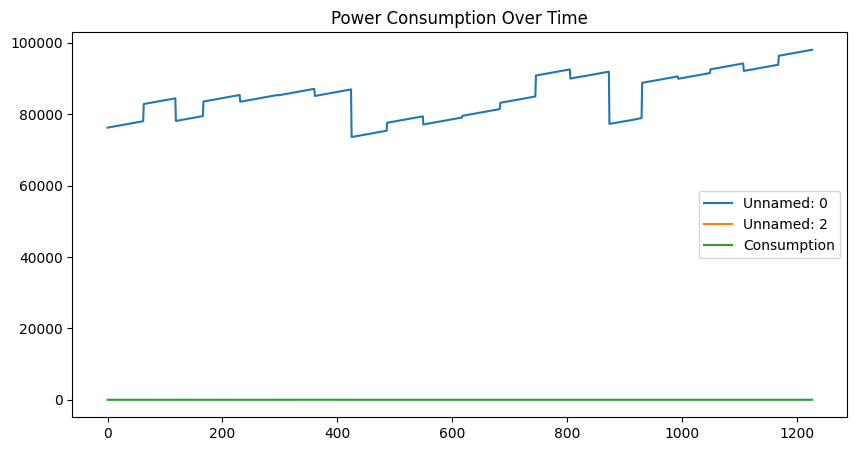

ADF Statistic: -3.8474891226902597
p-value: 0.0024571468528052135


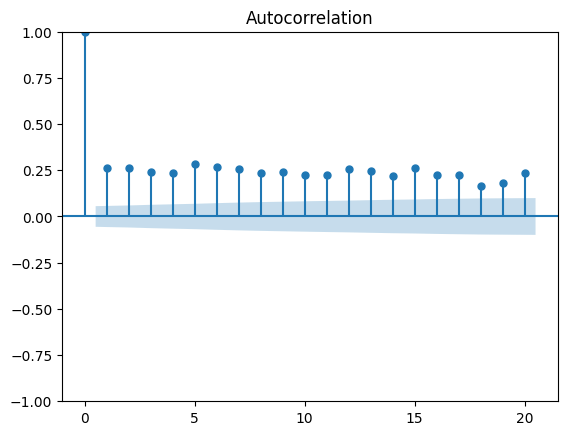

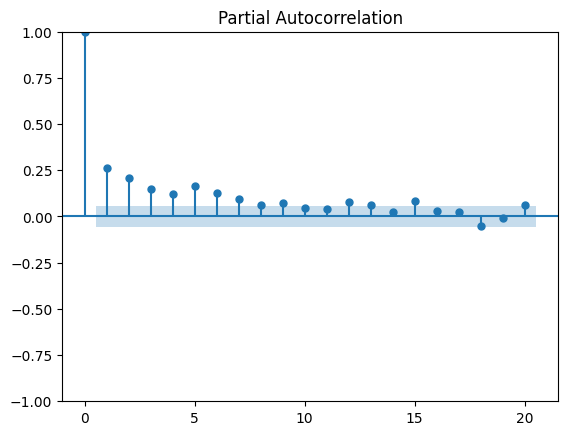

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                 1228
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3151.588
Date:                Wed, 06 Nov 2024   AIC                           6309.176
Time:                        03:07:59   BIC                           6324.513
Sample:                             0   HQIC                          6314.947
                               - 1228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0018      0.027     -0.065      0.948      -0.055       0.051
ma.L1         -0.9212      0.009    -97.721      0.000      -0.940      -0.903
sigma2         9.9507      0.208     47.829      0.0

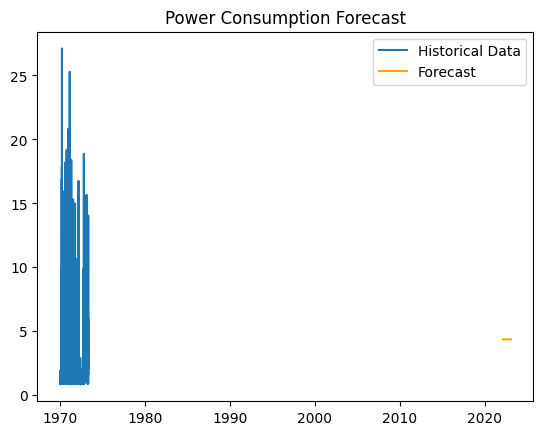

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # This line is added to import the necessary plotting functions

data = pd.read_csv("/content/KwhConsumptionBlower78_1.csv")
data.head()
data.plot(figsize=(10,5))
plt.title("Power Consumption Over Time")
plt.show()

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    return result[1] < 0.05  # True if stationary #Fixed: Indentation corrected to align with function body
is_stationary = adf_test(data["Consumption"])

if not is_stationary:
    data_diff = data["Consumption"].diff().dropna()
    plt.plot(data_diff)
    plt.title("Differenced Power Consumption")
    plt.show()
else:
    data_diff = data["Consumption"]

plot_acf(data_diff, lags=20) # Assuming 'plot_acf' is imported from statsmodels.graphics.tsaplots
plt.show()

plot_pacf(data_diff, lags=20) # Assuming 'plot_pacf' is imported from statsmodels.graphics.tsaplots
plt.show()

p, d, q = 1, 1, 1  # example values; adjust based on plots

model = ARIMA(data["Consumption"], order=(p, d, q))
fitted_model = model.fit()
print(fitted_model.summary())

forecast_steps = 12  # Number of months to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

last_date = pd.to_datetime(data['TxnDate'].iloc[-1])  # Convert to datetime if necessary
forecast_index = pd.date_range(last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

plt.plot(data["Consumption"], label="Historical Data")
plt.plot(forecast_index, forecast, label="Forecast", color='orange')
plt.legend()
plt.title("Power Consumption Forecast")
plt.show()